Exercise 01:

In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

print(np.shape(images[0]))
#The images are of size 8x8

#Interpolate using nearest neighbor
img_nearest = images[3]
assert 2 == len (img_nearest.shape)
plt.figure()
plt.gray()
plt.imshow(img_nearest,interpolation = "nearest" ) # also try interpolation =" bicubic "
plt.show()

#Interpolate using bicubic
img_bicubic = images[3]
assert 2 == len (img_bicubic.shape)
plt.figure()
plt.gray()
plt.imshow(img_bicubic,interpolation = "bicubic" ) # also try interpolation =" bicubic "
plt.show()

x_3and9 = []
y_3and9 = []
image_3and9 = []
for i in range(len(data)):
    if target[i] == 3 or target[i] == 9:
        x_3and9.append(data[i])
        y_3and9.append(target[i]) 
        image_3and9.append(images[i])

X_train, X_test, y_train, y_test =\
    model_selection.train_test_split(x_3and9, y_3and9, test_size = 0.4, random_state = 0)


Exercise 02

Exercise 03

In [ ]:
# Problem 3.1

def fit_lda(training_features, training_labels):
    m_1 = np.array([0,0])
    m1 = np.array([0,0])
    covmat_1 = np.matrix([[0,0], [0,0]])
    covmat1 = np.matrix([[0,0], [0,0]])
    N = len(training_features)
    
    ## mu-matrix
    for i in range(N):
        if training_labels[i] == -1:
            m_1 = m_1 + training_features[i]
        else:
            m1 = m1 + training_features[i]
    m_1 = m_1*(1/sum(training_labels == -1))
    m1 = m1*(1/sum(training_labels == 1))
    mu = np.matrix([m_1, m1])
    for i in range(N):
        if training_labels[i] == -1:
            temp1 = np.matrix(training_features[i]-mu[0])
            covmat_1 = covmat_1 + np.transpose(temp1).dot(temp1)
        else:
            temp1 = np.matrix(training_features[i]-mu[1])
            covmat1 = covmat1 + np.transpose(temp1).dot(temp1)
    covmat = covmat_1 + covmat1
    covmat = covmat/N
    p = 0
    
    return mu, covmat, p
training_features = features2d(X_train)
training_labels = correct_labels(y_train)
mu, covmat, p = fit_lda(training_features, training_labels)

In [ ]:
# Problem 3.2

import math 
def predict_lda(mu, covmat, p, test_features, test_labels):
    N1 = sum(test_labels == 1)
    N_1 = sum(test_labels == -1)
    N = N1+N_1
    predicted_labels = []
    
    beta = np.linalg.inv(covmat).dot(np.transpose(mu[1]-mu[0]))
    b = -0.5*(mu[1]+mu[0]).dot(beta)+math.log10(N1/N_1)
    
    for i in test_features:
        predicted_labels.append(sign(i,beta,b))
    return np.array(predicted_labels)

def sign(x,beta,b):
    x = x.dot(beta)+b
    if x > -b:
        return 1
    else:
        return -1
    
training_labels = correct_labels(y_train)
training_prediction = predict_lda(mu, covmat, p, training_features, training_labels)
print("Training Error:", np.mean(training_prediction != training_labels))

test_features = features2d(X_test)
test_labels = correct_labels(y_test)
test_prediction = predict_lda(mu, covmat, p, test_features, test_labels)
print("Test Error:", np.mean(test_prediction != test_labels))



In [ ]:
# Problem 3.3

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


def plot_decision_regions(features, labels, mu, covmat, p):
    # Define the grid
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    Z = predict_lda(mu, covmat, p, grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.RdBu, edgecolors='black')
    
    for i, (m, c) in enumerate(zip(mu, covmat)):
        eigenvalues, eigenvectors = np.linalg.eig(c)
        std_devs = np.sqrt(eigenvalues)
        angle = np.degrees(np.arctan2(*eigenvectors[0][::-1]))
        ellipse = Ellipse(xy=m, width=2 * std_devs[0], height=2 * std_devs[1], angle=angle, alpha=0.3)
        plt.gca().add_artist(ellipse)
        ellipse.set_facecolor('none')
        if i == 0:
            ellipse.set_edgecolor('red')
        else:
            ellipse.set_edgecolor('blue')

        for j, std_dev in enumerate(std_devs):
            if eigenvectors[j][0] == 0:
                angle = np.pi / 2
            else:
                angle = np.arctan(eigenvectors[j][1] / eigenvectors[j][0])
            x, y = m + std_dev * np.array([np.cos(angle), np.sin(angle)])
            plt.plot([m[0], x], [m[1], y], '-', color='black')

    plt.legend(['Class 3', 'Class 9', 'Cluster 3', 'Cluster 9'])

    plt.show()


mu, covmat, p = fit_lda(train_features, y_train)
try:
    plot_decision_regions(train_features, y_train, mu, covmat, p)
except:
    print("")

In [ ]:
# Problem 3.4

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

digits = load_digits()
X = digits.data
y = digits.target
y[y == 3] = -1
y[y == 9] = 1

kf = KFold(n_splits=10, shuffle=True, random_state=42)
test_errors = []
sklearn_test_errors = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mu, covmat, p = fit_lda(X_train, y_train)
    y_pred = predict_lda(mu, covmat, p, X_test)
    test_error = np.mean(y_pred != y_test)
    test_errors.append(test_error)

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    sklearn_y_pred = lda.predict(X_test)
    sklearn_test_error = np.mean(sklearn_y_pred != y_test)
    sklearn_test_errors.append(sklearn_test_error)

print("Our LDA test error: ", np.mean(test_errors))
print("Sklearn LDA test error: ", np.mean(sklearn_test_errors))

Exercise 04

TypeError: only integer scalar arrays can be converted to a scalar index

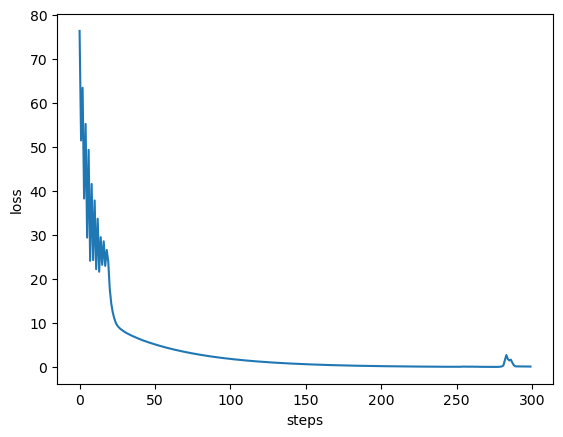

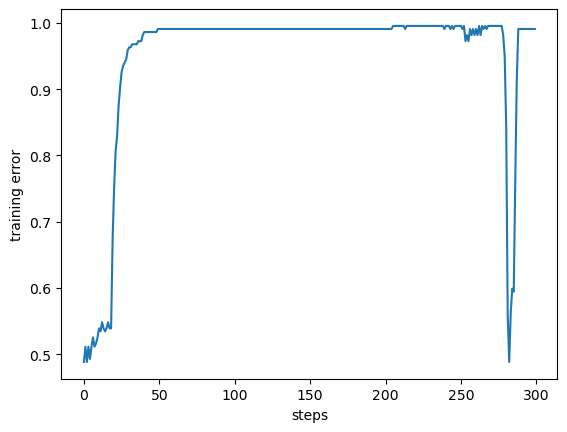

In [ ]:
#Exercise 04

from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC

def relu(t):
    if( t <= 0):
        return 0
    elif(t > 0):
        return t

# Calculate the loss for the svm approach
def calculate_loss(training_features, training_labels, beta, b, lam):
    n = len(training_labels)
    sum = 0
    for i in range(n):
        sum += relu(1 - (training_labels[i]*(training_features[i].dot(beta) + b)))

    loss = ((1/2) * (np.transpose(beta).dot(beta))) + ((lam/n) * sum)
    
    return loss

# Calculate the loss derivation by deriving for beta
def calculate_loss_derive_beta(training_features, training_labels, beta, b, lam):
    sum = 0
    n = len(training_labels)
    for i in range(n):
        if((training_labels[i] * (training_features[i].dot(beta) + b)) < 1):
            sum += (-training_labels[i] * np.transpose(training_features[i].reshape(1,len(training_features[i]))))
             
    return beta + ((lam/n)*sum)

# Calculate the loss derivation by deriving for b
def calculate_loss_derive_b(training_features, training_labels, beta, b, lam):
    sum = 0
    n = len(training_labels)

    for i in range(n):
        if((training_labels[i] * (training_features[i].dot(beta) + b)) < 1):
            sum += (-training_labels[i])

    return (lam/n)*sum

def fit_svm(training_features, training_labels, beta, b, lam, learning_rate):
    #Calculate loss for current beta and b
    loss = calculate_loss(training_features, training_labels, beta, b, lam)
    
    #calculate new beta and b
    new_beta = beta - learning_rate * calculate_loss_derive_beta(training_features, training_labels, beta, b, lam)
    new_b = b - learning_rate * calculate_loss_derive_b(training_features, training_labels, beta, b, lam)

    return loss, new_beta, new_b


def predict_svm(beta, b, test_features):
    predicted_labels = []
    for i in range(len(test_features)):
        #look at the sign after applying the prediction line
        predicted_label = np.sign(test_features[i].dot(beta) + b)
        predicted_labels.append(predicted_label[0])
    return predicted_labels

def verify_prediction_svm(predicted_labels, test_labels):
    correct_labels = 0
    total_labels = len(predicted_labels)
    #Compare predicted labels to actual labels
    for i in range(total_labels):
        if (predicted_labels[i] == test_labels[i]):
            correct_labels += 1
        elif (predicted_labels[i] == test_labels[i]):
            correct_labels += 1
    return correct_labels/total_labels
        

def train_and_verify_svm(training_features, training_labels, lam, steps, learning_rate):
    # Initialize required variables
    number_of_features = len(training_features[0])
    beta = np.random.normal(size=(number_of_features, 1))
    b = 0
    losses = []
    training_errors = []
    training_rate_adjusted = False

    # train for steps steps
    for i in range(steps):
        loss, beta, b = fit_svm(training_features, training_labels, beta, b, lam, learning_rate)
        losses.append(loss[0][0])

        # After every step predict for the training set and look at accuracy
        predicted_labels = predict_svm(beta, b, training_features)
        training_error = verify_prediction_svm(predicted_labels, training_labels)
        training_errors.append(training_error)

        # If at least 2 steps have been run check if the training error changes in a meaningful way by checking if the error changed in the last two steps
        if len(training_errors) > 1:
            # If the error doesn't change change the learning rate once
            if(training_errors[-1] == training_errors[-2] and not training_rate_adjusted):
                training_rate_adjusted = True
                learning_rate = learning_rate/10

    return beta, b, losses, training_errors

# Change the 3s to -1 and the 9s to 1 for the test and train set
y_train[i==3] = -1
y_train[i==9] = 1

y_test[i==3] = -1
y_test[i==9] = 1

#initalize training parameters and start training
lam = 1
steps = 300
learning_rate = 0.1

beta, b, losses, training_errors = train_and_verify_svm(X_train, y_train, lam, steps, learning_rate)

predicted_labels = predict_svm(beta, b, X_test)

# Plot the loss
fig, ax = plt.subplots()  
ax.set_xlabel('steps')
ax.set_ylabel('loss')
ax.plot(losses) 

# Plot the training error
fig, ax = plt.subplots()  
ax.set_xlabel('steps')
ax.set_ylabel('training error')
ax.plot(training_errors, label='Training Error over time') 

# Setup the cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
test_errors = []
sklearn_test_errors = []
lambdas = [0.01, 0.1, 1, 10, 100]
steps = 20

# iterate through all lambdas and look which one gives the best result
for lam in lambdas:
    for train_index, test_index in kf.split(X_train):
        x_train_fold, x_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        beta, b, losses, training_errors = train_and_verify_svm(x_train_fold, y_train_fold, lam, steps, learning_rate)

        predicted_labels = predict_svm(beta, b, x_test_fold)
        test_error = np.mean(predicted_labels != y_test_fold)
    test_errors.append(test_error)
    
print("This lambda performed best" + str(lambdas[np.argmax(np.average(test_errors))]))
        
# Look at the test error of sthe sklearn implementation
svm = LinearSVC()
svm.fit(x_train_fold, y_train_fold)
sklearn_predicted_labels = svm.predict(x_test_fold)
sklearn_test_error = np.mean(sklearn_predicted_labels != y_test)

print("Our svm test error with best lambda: ", np.mean(test_errors))
print("Sklearn svm test error: ", np.mean(sklearn_test_errors))


